In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Sum of Absolute Differences (SAD): $SAD(f,g)=\sum_{m=1}^M \sum_{n=1}^N \vert f_{mn} - g_{mn} \vert$

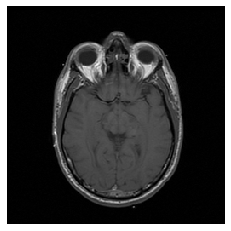

In [2]:
f = cv2.imread(r'./images/t1.jpg', cv2.IMREAD_GRAYSCALE)
f = f.astype(np.double)

plt.figure()
plt.imshow(f, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.show()
plt.close()

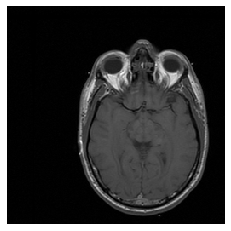

In [11]:
g = np.roll(f, 30, axis=1)
g = np.roll(g, 10, axis=0)

plt.figure()
plt.imshow(g, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.show()
plt.close()

In [12]:
def SAC(f,g):
    assert f.shape == g.shape
    return np.sum(np.abs(f-g).ravel())

In [13]:
SAC(f,g)

1472212.0

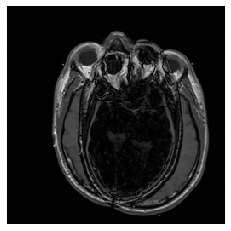

In [14]:
plt.figure()
plt.imshow(np.abs(f-g), cmap=plt.cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.show()
plt.close()

In [15]:
def n8_change(f, g, objective_function):
    '''
        f is the first and g is the second image which we want to
        register it ro f
    '''
    changes = np.zeros((3,3), dtype=np.double)
    
    changes[1,1] = objective_function(f,g)
    
    changes[0,0] = objective_function(f, np.roll(np.roll(g, -1, axis=0), -1, axis=1)) # from [1,1]
    changes[2,0] = objective_function(f, np.roll(np.roll(g, 1, axis=0), -1, axis=1)) # from [1,1]
    changes[2,2] = objective_function(f, np.roll(np.roll(g, 1, axis=0), 1, axis=1)) # from [1,1]
    changes[0,2] = objective_function(f, np.roll(np.roll(g, -1, axis=0), 1, axis=1)) # from [1,1]
    
    changes[0,1] = objective_function(f, np.roll(g, -1, axis=0)) # from [1,1]
    changes[2,1] = objective_function(f, np.roll(g, 1, axis=0)) # from [1,1]
    changes[1,0] = objective_function(f, np.roll(g, -1, axis=1)) # from [1,1]
    changes[1,2] = objective_function(f, np.roll(g, 1, axis=1)) # from [1,1]
    
    return changes

In [17]:
change = n8_change(f, g, SAC)
change

array([[1448502., 1470352., 1492214.],
       [1451516., 1472212., 1494544.],
       [1456020., 1476570., 1497196.]])

In [23]:
def index_to_coo(index, shape):
    return index // shape[0], index - index // shape[0]

In [24]:
index_to_coo(np.argmin(change), (3,3))

(0, 0)

In [29]:
def apply_translation(f, min_coo):
    r_trans = min_coo[0] - 1
    c_trans = min_coo[1] - 1
    
    g = np.copy(f)
    
    g = np.roll(g, r_trans, axis=1)
    g = np.roll(g, c_trans, axis=0)
    
    return g

In [30]:
h = apply_translation(g, index_to_coo(np.argmin(change), (3,3)))

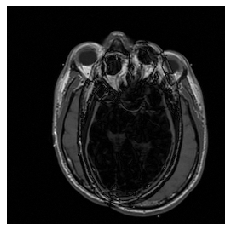

In [31]:
plt.figure()
plt.imshow(np.abs(f-h), cmap=plt.cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.show()
plt.close()

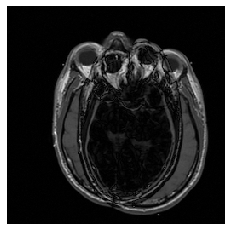

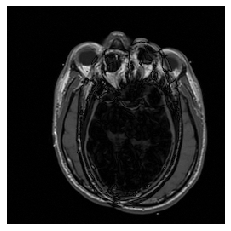

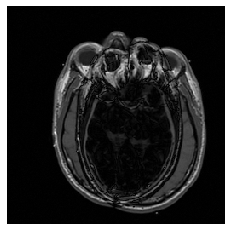

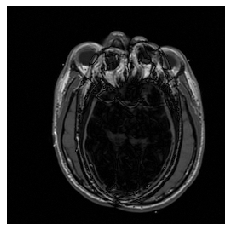

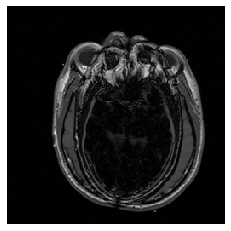

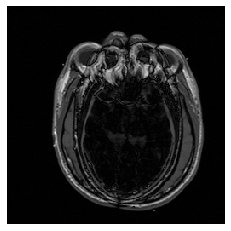

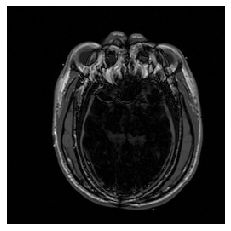

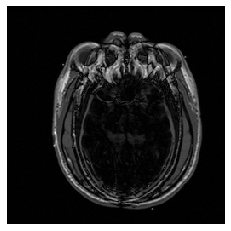

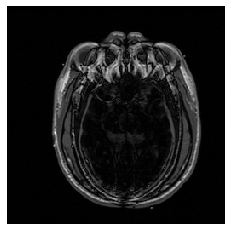

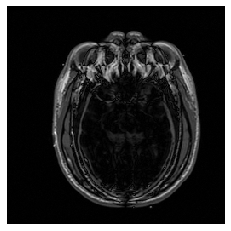

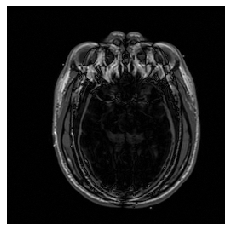

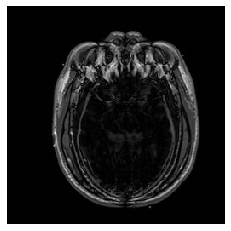

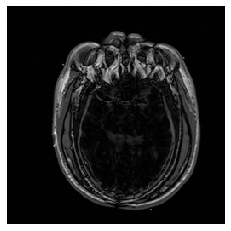

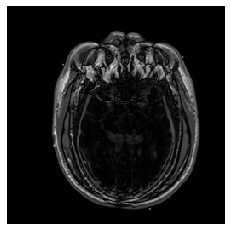

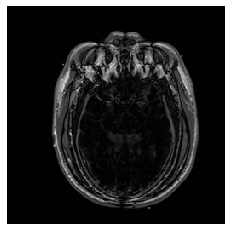

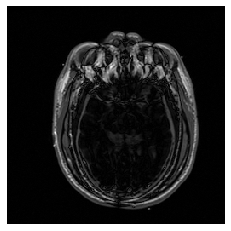

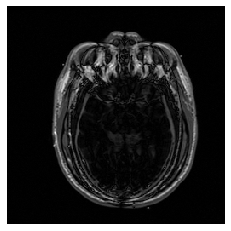

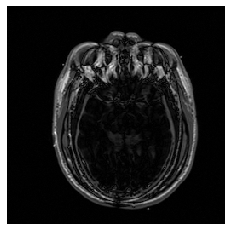

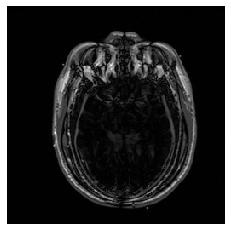

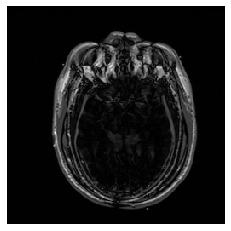

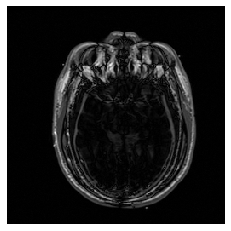

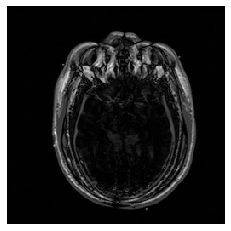

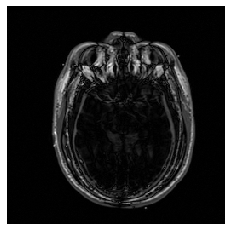

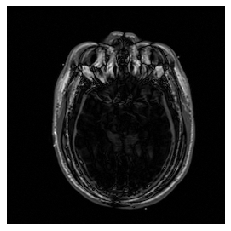

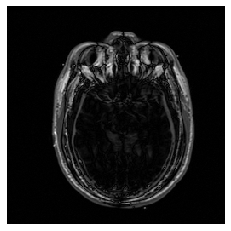

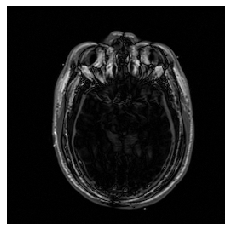

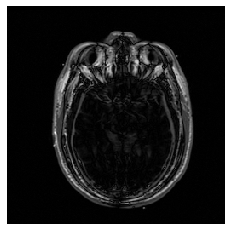

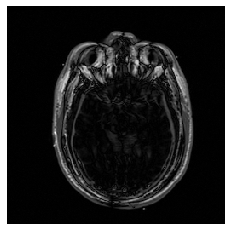

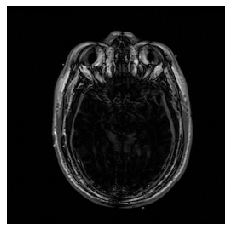

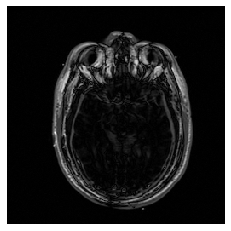

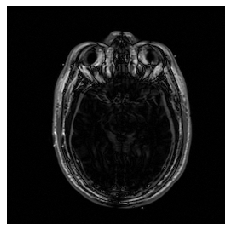

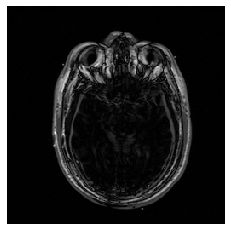

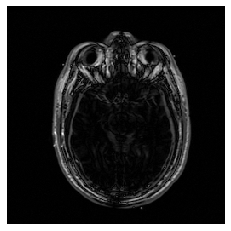

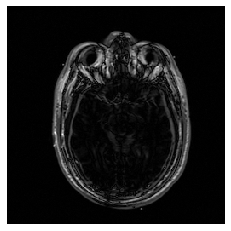

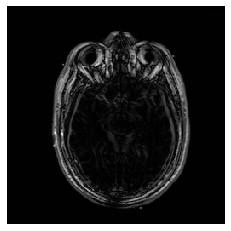

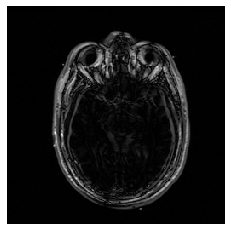

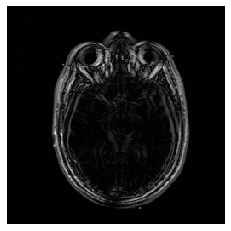

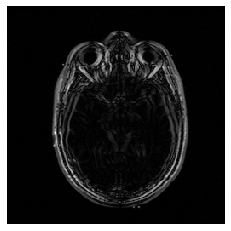

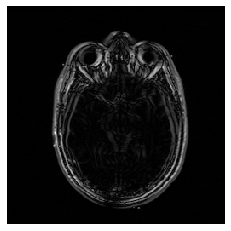

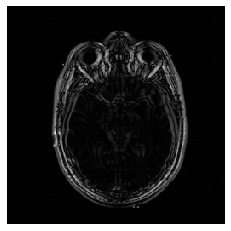

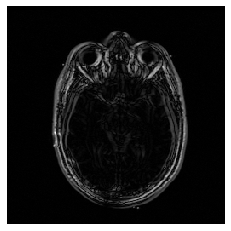

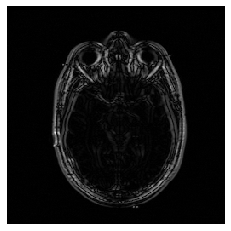

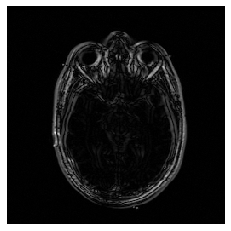

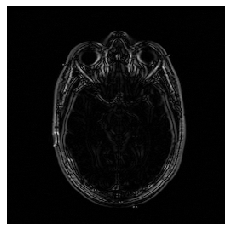

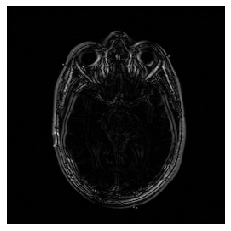

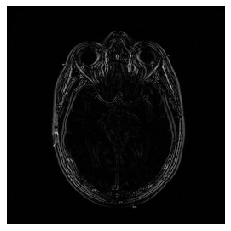

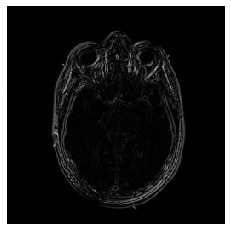

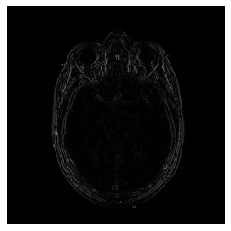

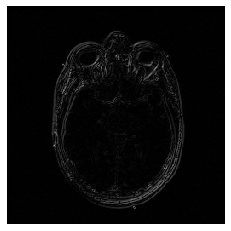

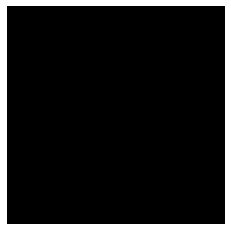

After 50 steps, we arrived at SAC equal to 0


In [34]:
h = np.copy(g)
count = 0
while (True):
    # computing change in N_8
    change = n8_change(f, h, SAC)
    
    # min index
    min_index = np.argmin(change)
    
    # min_coo
    min_coo = index_to_coo(min_index, (3,3))
    
    # apply translation
    h = apply_translation(h, min_coo)
    
    plt.figure()
    plt.imshow(np.abs(f-h), cmap=plt.cm.gray, vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
    plt.close()
    
    count += 1
    
    if SAC(f, h) <= 100:
        break

print("After {} steps, we arrived at SAC equal to {:0.0f}".format(count, SAC(f,h)))